In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
!ls

drive  sample_data


In [ ]:
os.chdir("drive/My Drive")

In [ ]:
os.chdir("F1_drivers/F1_images")

os.chdir("..")




In [ ]:
!ls


1211902811.jpeg			     model-006.model  model-015.model
data.npy			     model-007.model  model-016.model
F1_images			     model-008.model  model-017.model
haarcascade_frontalface_default.xml  model-009.model  model-018.model
h_full_809.png			     model-010.model  model-019.model
model-002.model			     model-011.model  model-020.model
model-003.model			     model-012.model  t1larg.vettel.gi.jpg
model-004.model			     model-013.model  target.npy
model-005.model			     model-014.model


In [ ]:
img = cv2.imread('h_full_809.png')
img.shape

(1024, 1024, 3)

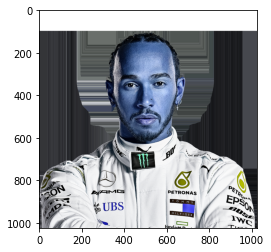

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 1024)

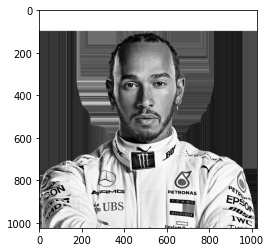

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[323, 201, 360, 360]], dtype=int32)

In [ ]:
(x,y,w,h) = faces[0]
x,y,w,h

(323, 201, 360, 360)

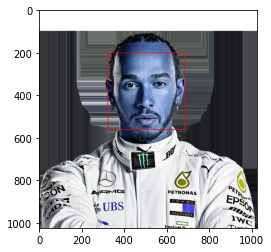

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

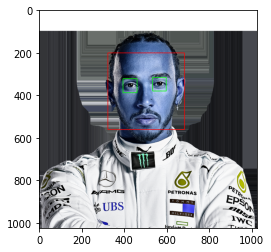

In [ ]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

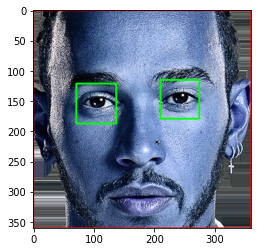

In [ ]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

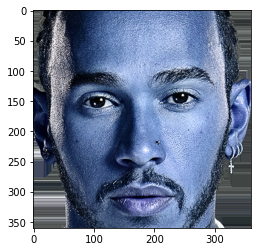

In [ ]:
cropped_image = get_cropped_image_if_2_eyes('h_full_809.png')
plt.imshow(cropped_image)

In [ ]:
path_to_data = "./F1_images/"
path_to_cr_data = "./cropped/"

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['./F1_images/daniel',
 './F1_images/lewis',
 './F1_images/pierre',
 './F1_images/sebastian']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

daniel
Generating cropped images in folder:  ./cropped/daniel
lewis
Generating cropped images in folder:  ./cropped/lewis
pierre
Generating cropped images in folder:  ./cropped/pierre
sebastian
Generating cropped images in folder:  ./cropped/sebastian


In [ ]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

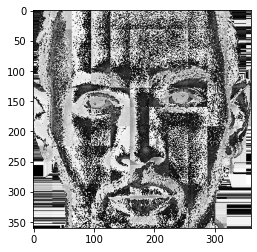

In [ ]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'daniel': 0, 'lewis': 1, 'pierre': 2, 'sebastian': 3}

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [ ]:
len(X[0])

4096

In [ ]:
y[0]

0

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(100, 4096)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.84

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       1.00      0.75      0.86         4
           2       0.00      0.00      0.00         2
           3       1.00      0.75      0.86         4

    accuracy                           0.84        25
   macro avg       0.70      0.62      0.65        25
weighted avg       0.79      0.84      0.80        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.680000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.613333,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.600000,{'logisticregression__C': 1}


In [ ]:
best_estimators

{'logistic_regression': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('logisticregression',
                  LogisticRegression(C=1, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='liblinear', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False), 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
            

In [ ]:
best_estimators['svm'].score(X_test,y_test)

0.88

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.72

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.56

In [ ]:
best_clf = best_estimators['svm']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[14,  0,  0,  1],
       [ 0,  4,  0,  0],
       [ 1,  1,  0,  0],
       [ 0,  0,  0,  4]])

Text(69.0, 0.5, 'Truth')

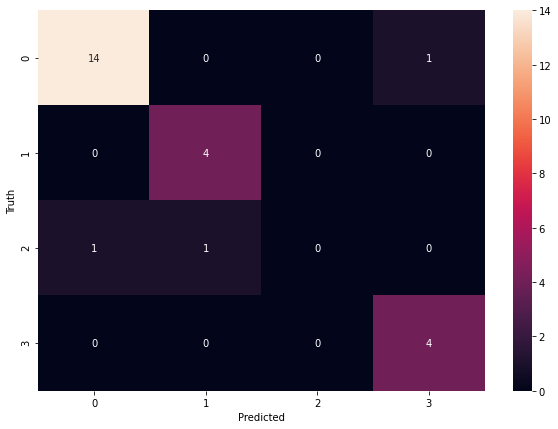

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

{'daniel': 0, 'lewis': 1, 'pierre': 2, 'sebastian': 3}

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [ ]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [ ]:
__class_name_to_number = class_dict
__class_number_to_name = { 0:'daniel', 1:'lewis' , 2:'pierre', 3:'sebastian'}

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

    
    img = cv2.imread(image_path)
    

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    cropped_faces = []
    for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                cropped_faces.append(roi_color)
    return cropped_faces

In [ ]:
def class_number_to_name(class_num):
    return __class_number_to_name[class_num]

In [ ]:
def classify_image(file_path):

    img = cv2.imread(file_path)
    plt.imshow(img)
    imgs = get_cropped_image_if_2_eyes(file_path)

    result = []
    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 4)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array = 32*32*3 + 32*32

        final = combined_img.reshape(1,len_image_array).astype(float)
        result.append({
            'class': class_number_to_name(best_clf.predict(final)[0]),
            'class_probability': np.around(best_clf.predict_proba(final)*100,2).tolist()[0],
            'class_dictionary': __class_name_to_number
        })

    return result

[{'class': 'daniel', 'class_probability': [57.16, 32.5, 2.36, 7.98], 'class_dictionary': {'daniel': 0, 'lewis': 1, 'pierre': 2, 'sebastian': 3}}]


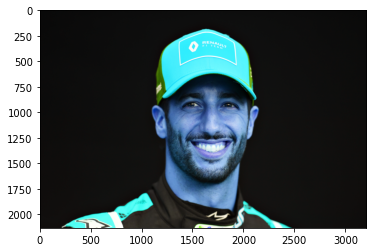

In [ ]:
print(classify_image("1211902811.jpeg"))

[{'class': 'pierre', 'class_probability': [49.04, 19.58, 24.9, 6.47], 'class_dictionary': {'daniel': 0, 'lewis': 1, 'pierre': 2, 'sebastian': 3}}]


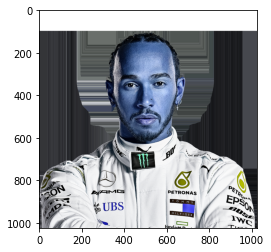

In [ ]:
print(classify_image("h_full_809.png"))

[{'class': 'daniel', 'class_probability': [57.69, 2.01, 22.21, 18.09], 'class_dictionary': {'daniel': 0, 'lewis': 1, 'pierre': 2, 'sebastian': 3}}]


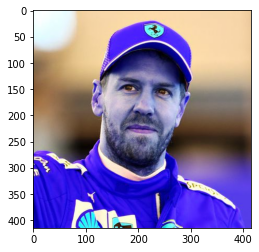

In [ ]:
print(classify_image("https___specials-images.forbesimg.com_imageserve_5ece942989ee2f0006814ebb_0x0.jpg_background=000000&cropX1=1893&cropX2=3476&cropY1=841&cropY2=2422"))